# Analysis on Drug<>Labtest pairs of Top 10 Drugs
Run all cells or view results below.

## Import Libraries

In [ ]:
import pandas as pd
import datetime
import numpy as np
from scipy.stats import mannwhitneyu
from scipy import stats
from tqdm import tqdm
import os

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PARENT='/content/drive/MyDrive/TAU'
DATA = PARENT+'/Datasets/mimiciii/1.4'

In [ ]:
for i in os.walk(os.path.join(DATA)):
    print(i)

('/content/drive/MyDrive/TAU/Datasets/mimiciii/1.4', [], ['CALLOUT.csv.gz', 'ADMISSIONS.csv.gz', 'CAREGIVERS.csv.gz', 'D_ITEMS.csv.gz', 'D_ICD_PROCEDURES.csv.gz', 'D_ICD_DIAGNOSES.csv.gz', 'ICUSTAYS.csv.gz', 'CHARTEVENTS.csv.gz', 'DRGCODES.csv.gz', 'CPTEVENTS.csv.gz', 'DIAGNOSES_ICD.csv.gz', 'D_CPT.csv.gz', 'D_LABITEMS.csv.gz', 'DATETIMEEVENTS.csv.gz', 'INPUTEVENTS_CV.csv.gz', 'INPUTEVENTS_MV.csv.gz', 'LABEVENTS.csv.gz', 'MICROBIOLOGYEVENTS.csv.gz', 'OUTPUTEVENTS.csv.gz', 'PATIENTS.csv.gz', 'README.md', 'PROCEDURES_ICD.csv.gz', 'PRESCRIPTIONS.csv.gz', 'TRANSFERS.csv.gz', 'PROCEDUREEVENTS_MV.csv.gz', 'SERVICES.csv.gz', 'LICENSE.txt', 'NOTEEVENTS.csv.gz', 'SHA256SUMS.txt', 'index.html'])


## Analysis - Top 10 Drugs

### Load Results

In [ ]:
results = pd.read_csv(os.path.join(PARENT, 'Drug-Labtest_Pairs_Top10Drugs.csv'))

In [ ]:
results = results.drop(columns=['Unnamed: 0'])

In [ ]:
results

,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
0,Furosemide,"Calcium, Total",3689,7.865194,0.596117,15.318731,3.130199,7.895690,0.767306,12.782805,5.543262,0.000487,0.056653
1,Furosemide,Chloride,1968,106.545224,9.555180,15.720207,3.192894,106.237297,9.658326,11.904870,6.130098,0.015742,0.314740
2,Furosemide,Creatinine,3930,2.309898,1.588903,16.197752,2.726862,2.295802,1.562848,12.027998,6.323819,0.127153,0.691735
3,Furosemide,Phosphate,2442,3.661261,2.088406,15.352662,3.674798,3.619165,2.088854,12.280774,5.934769,0.479578,0.481294
4,Furosemide,Potassium,414,4.069082,1.339911,14.442351,5.496923,4.050725,1.323301,10.155837,6.765043,0.454535,0.842826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Docusate Sodium,Calculated Total CO2,480,26.868750,8.603385,16.759549,6.344186,27.554167,8.572738,7.386979,6.572813,0.040627,0.216607
422,Docusate Sodium,"Potassium, Whole Blood",107,4.128972,1.292869,12.129128,8.536525,4.085047,1.282598,8.191900,7.232208,0.322723,0.803220
423,Docusate Sodium,Phenytoin,134,8.267164,6.803181,15.278731,3.094043,8.167164,5.349426,15.054851,3.909030,0.294080,0.893697
424,Docusate Sodium,Troponin T,271,1.312568,2.307688,15.977245,4.758200,1.287048,2.276174,10.673063,6.441718,0.370285,0.896922


### Significance Test - 0.05 P value threshold

In [ ]:
results[results['Ttest-pvalue']>0.05]

,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
0,Furosemide,"Calcium, Total",3689,7.865194,0.596117,15.318731,3.130199,7.895690,0.767306,12.782805,5.543262,0.000487,0.056653
1,Furosemide,Chloride,1968,106.545224,9.555180,15.720207,3.192894,106.237297,9.658326,11.904870,6.130098,0.015742,0.314740
2,Furosemide,Creatinine,3930,2.309898,1.588903,16.197752,2.726862,2.295802,1.562848,12.027998,6.323819,0.127153,0.691735
3,Furosemide,Phosphate,2442,3.661261,2.088406,15.352662,3.674798,3.619165,2.088854,12.280774,5.934769,0.479578,0.481294
4,Furosemide,Potassium,414,4.069082,1.339911,14.442351,5.496923,4.050725,1.323301,10.155837,6.765043,0.454535,0.842826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Docusate Sodium,Calculated Total CO2,480,26.868750,8.603385,16.759549,6.344186,27.554167,8.572738,7.386979,6.572813,0.040627,0.216607
422,Docusate Sodium,"Potassium, Whole Blood",107,4.128972,1.292869,12.129128,8.536525,4.085047,1.282598,8.191900,7.232208,0.322723,0.803220
423,Docusate Sodium,Phenytoin,134,8.267164,6.803181,15.278731,3.094043,8.167164,5.349426,15.054851,3.909030,0.294080,0.893697
424,Docusate Sodium,Troponin T,271,1.312568,2.307688,15.977245,4.758200,1.287048,2.276174,10.673063,6.441718,0.370285,0.896922


In [ ]:
significant = results[results['Ttest-pvalue']<=0.05]

### Plots and Analysis

In [ ]:
vals = significant.groupby('Medication Name').sum()['Number of patients']

In [ ]:
vals

Medication Name
Acetaminophen          60731
Docusate Sodium        44501
Furosemide             21077
Heparin                23947
Insulin                63210
Lorazepam               6758
Metoprolol              3128
Metoprolol Tartrate     1978
Morphine Sulfate       50023
Potassium Chloride     15461
Name: Number of patients, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = list(vals.keys())
y = list(vals)

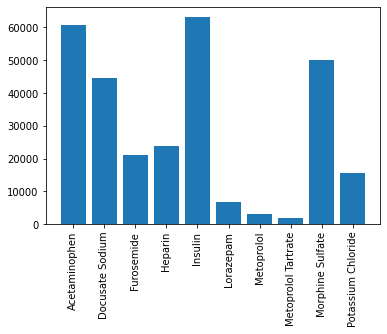

In [ ]:
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

## Analysis - Top 25 Drugs

In [ ]:
res_analysis = pd.read_csv(os.path.join(PARENT, 'Drug-Labtest_Pairs_Top25Drugs_1000Subjects.csv'))

In [ ]:
res_analysis.shape

(42, 14)

### Bonferroni - From scratch

In [ ]:
alpha = 0.05/res_analysis.shape[0]

In [ ]:
significant = res_analysis[res_analysis['Ttest-pvalue']<=alpha]

In [ ]:
significant.shape[0]

10

In [ ]:
significant

,Unnamed: 0,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
1,1,Furosemide,Hematocrit,1662,30.031769,3.496685,9.183714,7.349806,29.616185,3.585039,4.161352,2.545585,9.830326e-04,7.249974e-04
4,4,Metoprolol,Glucose,1249,145.773419,45.481724,10.218135,7.317700,139.716573,36.937335,4.618842,3.452136,4.118170e-04,2.641504e-04
5,5,Metoprolol,Hematocrit,1804,30.398060,3.626447,9.041935,7.205315,29.935089,3.707776,4.270547,2.489124,6.655122e-04,1.522157e-04
8,8,Insulin,Glucose,1349,156.616012,54.443728,9.816901,7.176339,148.210526,55.581377,4.770694,3.298712,1.369751e-08,7.437708e-05
16,16,Acetaminophen,Glucose,1260,147.391270,46.280442,12.163783,7.715060,140.240476,44.644426,4.882804,4.039040,1.383501e-09,8.119825e-05
20,20,Magnesium Sulfate,Glucose,1342,147.507452,49.223299,13.688065,7.520391,137.737705,53.903978,4.406793,3.999151,2.976489e-14,1.000583e-06
24,24,Morphine Sulfate,Glucose,1106,146.963834,44.547484,13.978813,7.562042,135.595841,39.911716,4.501718,4.120324,4.347717e-14,3.136884e-10
31,31,Calcium Gluconate,Glucose,1115,146.204484,47.726700,15.538580,7.038902,133.864574,41.804866,4.229552,4.112174,3.478459e-16,1.024637e-10
35,35,Heparin,Hematocrit,1164,31.129553,3.887054,10.337514,7.528771,30.609107,3.703862,4.052405,2.466455,1.050737e-03,9.570196e-04
36,36,Heparin,Hemoglobin,1108,10.544856,1.394706,8.178986,6.769455,10.352708,1.323330,4.068291,2.348910,3.836271e-04,8.931188e-04


In [ ]:
differnt = res_analysis[res_analysis['Ttest-pvalue']>alpha]

In [ ]:
differnt

,Unnamed: 0,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
0,0,Furosemide,Glucose,1206,143.018242,47.949451,11.030473,7.489436,139.522388,41.367846,4.742786,3.789923,0.006946,0.055351
2,2,Furosemide,Hemoglobin,1612,10.170409,1.296469,6.520565,6.280393,10.078474,1.248096,4.177750,2.520589,0.015245,0.040337
3,3,Furosemide,Red Blood Cells,1624,3.371219,0.449200,5.686145,5.618787,3.343337,0.443325,4.165456,2.491619,0.044052,0.075117
6,6,Metoprolol,Hemoglobin,1732,10.299538,1.330220,6.426617,5.895581,10.175982,1.289665,4.279446,2.446272,0.005704,0.005544
7,7,Metoprolol,Red Blood Cells,1762,3.425988,0.453451,5.798534,5.417160,3.380136,0.448848,4.275161,2.469546,0.002922,0.002575
9,9,Insulin,Hematocrit,1834,30.171865,3.682096,9.098519,7.435464,29.811287,3.690969,4.491948,2.580074,0.004662,0.003077
10,10,Insulin,Hemoglobin,1756,10.240547,1.349769,6.920027,6.316697,10.120216,1.287718,4.547058,2.522600,0.007283,0.006905
11,11,Insulin,Red Blood Cells,1782,3.405802,0.465815,6.507192,6.067024,3.362851,0.447296,4.526394,2.562490,0.008697,0.005018
12,12,Potassium Chloride,Glucose,1056,143.607008,46.669575,8.908507,6.839399,139.240530,42.858047,5.344839,3.665654,0.000556,0.025235
13,13,Potassium Chloride,Hematocrit,1693,30.201477,3.607351,8.163674,6.845699,30.055877,3.716279,4.912345,2.686169,0.220235,0.247468


### Bonferroni - Using package

In [ ]:
from statsmodels.stats.multitest import multipletests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pvals = res_analysis['Ttest-pvalue']

In [ ]:
bonferroni_analysis = multipletests(pvals, alpha=0.05, method='bonferroni')

In [ ]:
bonferroni_analysis

(array([False,  True, False, False,  True,  True, False, False,  True,
        False, False, False, False, False, False, False,  True, False,
        False, False,  True, False, False, False,  True, False, False,
        False, False, False, False,  True, False, False, False,  True,
         True, False, False, False, False, False]),
 array([1.00000000e+00, 3.04498891e-02, 1.00000000e+00, 1.00000000e+00,
        1.10943187e-02, 6.39306070e-03, 2.32828722e-01, 1.08140943e-01,
        3.12383748e-03, 1.29252413e-01, 2.90023681e-01, 2.10767343e-01,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        3.41032639e-03, 4.14891571e-01, 1.00000000e+00, 1.00000000e+00,
        4.20244972e-05, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.31749118e-08, 7.16224124e-01, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.30347405e-09,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.01948251e-02,
        3.751098

In [86]:
reject, pvals_corrected, _, alphacBonf = bonferroni_analysis

In [87]:
pvals_corrected

array([1.00000000e+00, 3.04498891e-02, 1.00000000e+00, 1.00000000e+00,
       1.10943187e-02, 6.39306070e-03, 2.32828722e-01, 1.08140943e-01,
       3.12383748e-03, 1.29252413e-01, 2.90023681e-01, 2.10767343e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       3.41032639e-03, 4.14891571e-01, 1.00000000e+00, 1.00000000e+00,
       4.20244972e-05, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.31749118e-08, 7.16224124e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.30347405e-09,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.01948251e-02,
       3.75109889e-02, 1.18045896e-01, 1.00000000e+00, 7.24050423e-01,
       8.54613912e-01, 1.00000000e+00])

In [88]:
not_reject = [not i for i in reject]

In [89]:
res_analysis[not_reject]

,Unnamed: 0,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
0,0,Furosemide,Glucose,1206,143.018242,47.949451,11.030473,7.489436,139.522388,41.367846,4.742786,3.789923,0.006946,0.055351
2,2,Furosemide,Hemoglobin,1612,10.170409,1.296469,6.520565,6.280393,10.078474,1.248096,4.177750,2.520589,0.015245,0.040337
3,3,Furosemide,Red Blood Cells,1624,3.371219,0.449200,5.686145,5.618787,3.343337,0.443325,4.165456,2.491619,0.044052,0.075117
6,6,Metoprolol,Hemoglobin,1732,10.299538,1.330220,6.426617,5.895581,10.175982,1.289665,4.279446,2.446272,0.005704,0.005544
7,7,Metoprolol,Red Blood Cells,1762,3.425988,0.453451,5.798534,5.417160,3.380136,0.448848,4.275161,2.469546,0.002922,0.002575
9,9,Insulin,Hematocrit,1834,30.171865,3.682096,9.098519,7.435464,29.811287,3.690969,4.491948,2.580074,0.004662,0.003077
10,10,Insulin,Hemoglobin,1756,10.240547,1.349769,6.920027,6.316697,10.120216,1.287718,4.547058,2.522600,0.007283,0.006905
11,11,Insulin,Red Blood Cells,1782,3.405802,0.465815,6.507192,6.067024,3.362851,0.447296,4.526394,2.562490,0.008697,0.005018
12,12,Potassium Chloride,Glucose,1056,143.607008,46.669575,8.908507,6.839399,139.240530,42.858047,5.344839,3.665654,0.000556,0.025235
13,13,Potassium Chloride,Hematocrit,1693,30.201477,3.607351,8.163674,6.845699,30.055877,3.716279,4.912345,2.686169,0.220235,0.247468


In [90]:
res_analysis[reject]

,Unnamed: 0,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
1,1,Furosemide,Hematocrit,1662,30.031769,3.496685,9.183714,7.349806,29.616185,3.585039,4.161352,2.545585,9.830326e-04,7.249974e-04
4,4,Metoprolol,Glucose,1249,145.773419,45.481724,10.218135,7.317700,139.716573,36.937335,4.618842,3.452136,4.118170e-04,2.641504e-04
5,5,Metoprolol,Hematocrit,1804,30.398060,3.626447,9.041935,7.205315,29.935089,3.707776,4.270547,2.489124,6.655122e-04,1.522157e-04
8,8,Insulin,Glucose,1349,156.616012,54.443728,9.816901,7.176339,148.210526,55.581377,4.770694,3.298712,1.369751e-08,7.437708e-05
16,16,Acetaminophen,Glucose,1260,147.391270,46.280442,12.163783,7.715060,140.240476,44.644426,4.882804,4.039040,1.383501e-09,8.119825e-05
20,20,Magnesium Sulfate,Glucose,1342,147.507452,49.223299,13.688065,7.520391,137.737705,53.903978,4.406793,3.999151,2.976489e-14,1.000583e-06
24,24,Morphine Sulfate,Glucose,1106,146.963834,44.547484,13.978813,7.562042,135.595841,39.911716,4.501718,4.120324,4.347717e-14,3.136884e-10
31,31,Calcium Gluconate,Glucose,1115,146.204484,47.726700,15.538580,7.038902,133.864574,41.804866,4.229552,4.112174,3.478459e-16,1.024637e-10
35,35,Heparin,Hematocrit,1164,31.129553,3.887054,10.337514,7.528771,30.609107,3.703862,4.052405,2.466455,1.050737e-03,9.570196e-04
36,36,Heparin,Hemoglobin,1108,10.544856,1.394706,8.178986,6.769455,10.352708,1.323330,4.068291,2.348910,3.836271e-04,8.931188e-04


In [91]:
significant = res_analysis[reject]
significant.to_csv(os.path.join(PARENT, 'Bonferroni_pvalues_druglab_pairs.csv'))

### FDR - Benjamini/Hochberg (non-negative) - Using package

In [ ]:
fdr1_analysis = multipletests(pvals, alpha=0.05, method='fdr_bh')

In [ ]:
fdr1_analysis

(array([False,  True, False, False,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False, False,  True,  True,
        False, False,  True, False, False, False,  True,  True, False,
        False, False, False, False,  True, False, False, False,  True,
         True,  True, False,  True,  True, False]),
 array([9.29902829e-02, 3.80623614e-03, 7.36588610e-02, 1.10489711e-01,
        1.58490268e-03, 1.06551012e-03, 1.55219148e-02, 9.83099485e-03,
        6.82065278e-04, 9.94249332e-03, 1.81264801e-02, 1.50548102e-02,
        5.04699654e-02, 3.15232837e-01, 5.93354324e-01, 5.93354324e-01,
        6.82065278e-04, 2.44053865e-02, 3.63456637e-01, 1.10489711e-01,
        1.40081657e-05, 1.01902390e-01, 3.15232837e-01, 7.92802598e-01,
        6.58745590e-09, 3.81079170e-02, 4.99304981e-01, 3.68172007e-01,
        2.60254940e-01, 7.52273790e-01, 3.54845650e-01, 4.30347405e-09,
        1.38424399e-01, 5.96646060e-02, 6.47658273e-01, 4.01948251e-03,
        4.019482

In [92]:
reject, pvals_corrected, _, alphacBonf = fdr1_analysis

In [93]:
pvals_corrected

array([9.29902829e-02, 3.80623614e-03, 7.36588610e-02, 1.10489711e-01,
       1.58490268e-03, 1.06551012e-03, 1.55219148e-02, 9.83099485e-03,
       6.82065278e-04, 9.94249332e-03, 1.81264801e-02, 1.50548102e-02,
       5.04699654e-02, 3.15232837e-01, 5.93354324e-01, 5.93354324e-01,
       6.82065278e-04, 2.44053865e-02, 3.63456637e-01, 1.10489711e-01,
       1.40081657e-05, 1.01902390e-01, 3.15232837e-01, 7.92802598e-01,
       6.58745590e-09, 3.81079170e-02, 4.99304981e-01, 3.68172007e-01,
       2.60254940e-01, 7.52273790e-01, 3.54845650e-01, 4.30347405e-09,
       1.38424399e-01, 5.96646060e-02, 6.47658273e-01, 4.01948251e-03,
       4.01948251e-03, 9.83715804e-03, 8.17217410e-02, 3.81079170e-02,
       4.27306956e-02, 9.82350635e-02])

In [94]:
not_reject = [not i for i in reject]

In [95]:
res_analysis[not_reject]

,Unnamed: 0,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
0,0,Furosemide,Glucose,1206,143.018242,47.949451,11.030473,7.489436,139.522388,41.367846,4.742786,3.789923,0.006946,0.055351
2,2,Furosemide,Hemoglobin,1612,10.170409,1.296469,6.520565,6.280393,10.078474,1.248096,4.177750,2.520589,0.015245,0.040337
3,3,Furosemide,Red Blood Cells,1624,3.371219,0.449200,5.686145,5.618787,3.343337,0.443325,4.165456,2.491619,0.044052,0.075117
12,12,Potassium Chloride,Glucose,1056,143.607008,46.669575,8.908507,6.839399,139.240530,42.858047,5.344839,3.665654,0.000556,0.025235
13,13,Potassium Chloride,Hematocrit,1693,30.201477,3.607351,8.163674,6.845699,30.055877,3.716279,4.912345,2.686169,0.220235,0.247468
14,14,Potassium Chloride,Hemoglobin,1624,10.231958,1.318444,5.864748,5.303654,10.204126,1.297935,4.910714,2.575467,0.320849,0.544396
15,15,Potassium Chloride,Red Blood Cells,1655,3.389801,0.446465,5.469476,4.932816,3.380532,0.447722,4.902951,2.543175,0.326375,0.550972
18,18,Acetaminophen,Hemoglobin,1706,10.295311,1.451120,8.877862,6.799972,10.246190,1.330799,4.257864,2.689658,0.263959,0.302881
19,19,Acetaminophen,Red Blood Cells,1650,3.432261,0.506188,7.734545,6.262874,3.402442,0.458658,4.347485,2.681459,0.096334,0.076291
21,21,Magnesium Sulfate,Hematocrit,1849,30.455327,3.685376,13.225870,7.660103,30.236344,3.541382,3.659672,2.372229,0.033326,0.065509


In [96]:
res_analysis[reject]

,Unnamed: 0,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
1,1,Furosemide,Hematocrit,1662,30.031769,3.496685,9.183714,7.349806,29.616185,3.585039,4.161352,2.545585,9.830326e-04,7.249974e-04
4,4,Metoprolol,Glucose,1249,145.773419,45.481724,10.218135,7.317700,139.716573,36.937335,4.618842,3.452136,4.118170e-04,2.641504e-04
5,5,Metoprolol,Hematocrit,1804,30.398060,3.626447,9.041935,7.205315,29.935089,3.707776,4.270547,2.489124,6.655122e-04,1.522157e-04
6,6,Metoprolol,Hemoglobin,1732,10.299538,1.330220,6.426617,5.895581,10.175982,1.289665,4.279446,2.446272,5.704374e-03,5.543541e-03
7,7,Metoprolol,Red Blood Cells,1762,3.425988,0.453451,5.798534,5.417160,3.380136,0.448848,4.275161,2.469546,2.922491e-03,2.574784e-03
8,8,Insulin,Glucose,1349,156.616012,54.443728,9.816901,7.176339,148.210526,55.581377,4.770694,3.298712,1.369751e-08,7.437708e-05
9,9,Insulin,Hematocrit,1834,30.171865,3.682096,9.098519,7.435464,29.811287,3.690969,4.491948,2.580074,4.662158e-03,3.077438e-03
10,10,Insulin,Hemoglobin,1756,10.240547,1.349769,6.920027,6.316697,10.120216,1.287718,4.547058,2.522600,7.283205e-03,6.905326e-03
11,11,Insulin,Red Blood Cells,1782,3.405802,0.465815,6.507192,6.067024,3.362851,0.447296,4.526394,2.562490,8.696757e-03,5.018270e-03
16,16,Acetaminophen,Glucose,1260,147.391270,46.280442,12.163783,7.715060,140.240476,44.644426,4.882804,4.039040,1.383501e-09,8.119825e-05


In [97]:
significant = res_analysis[reject]
significant.to_csv(os.path.join(PARENT, 'FDR_Benjamini_pvalues_druglab_pairs.csv'))

### FDR - two stage fdr correction  (non-negative) - Using package

In [ ]:
fdr2_analysis = multipletests(pvals, alpha=0.05, method='fdr_bh')

In [ ]:
fdr2_analysis

(array([False,  True, False, False,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False, False,  True,  True,
        False, False,  True, False, False, False,  True,  True, False,
        False, False, False, False,  True, False, False, False,  True,
         True,  True, False,  True,  True, False]),
 array([9.29902829e-02, 3.80623614e-03, 7.36588610e-02, 1.10489711e-01,
        1.58490268e-03, 1.06551012e-03, 1.55219148e-02, 9.83099485e-03,
        6.82065278e-04, 9.94249332e-03, 1.81264801e-02, 1.50548102e-02,
        5.04699654e-02, 3.15232837e-01, 5.93354324e-01, 5.93354324e-01,
        6.82065278e-04, 2.44053865e-02, 3.63456637e-01, 1.10489711e-01,
        1.40081657e-05, 1.01902390e-01, 3.15232837e-01, 7.92802598e-01,
        6.58745590e-09, 3.81079170e-02, 4.99304981e-01, 3.68172007e-01,
        2.60254940e-01, 7.52273790e-01, 3.54845650e-01, 4.30347405e-09,
        1.38424399e-01, 5.96646060e-02, 6.47658273e-01, 4.01948251e-03,
        4.019482

In [98]:
reject, pvals_corrected, _, alphacBonf = fdr2_analysis

In [99]:
pvals_corrected

array([9.29902829e-02, 3.80623614e-03, 7.36588610e-02, 1.10489711e-01,
       1.58490268e-03, 1.06551012e-03, 1.55219148e-02, 9.83099485e-03,
       6.82065278e-04, 9.94249332e-03, 1.81264801e-02, 1.50548102e-02,
       5.04699654e-02, 3.15232837e-01, 5.93354324e-01, 5.93354324e-01,
       6.82065278e-04, 2.44053865e-02, 3.63456637e-01, 1.10489711e-01,
       1.40081657e-05, 1.01902390e-01, 3.15232837e-01, 7.92802598e-01,
       6.58745590e-09, 3.81079170e-02, 4.99304981e-01, 3.68172007e-01,
       2.60254940e-01, 7.52273790e-01, 3.54845650e-01, 4.30347405e-09,
       1.38424399e-01, 5.96646060e-02, 6.47658273e-01, 4.01948251e-03,
       4.01948251e-03, 9.83715804e-03, 8.17217410e-02, 3.81079170e-02,
       4.27306956e-02, 9.82350635e-02])

In [100]:
not_reject = [not i for i in reject]

In [101]:
res_analysis[not_reject]

,Unnamed: 0,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
0,0,Furosemide,Glucose,1206,143.018242,47.949451,11.030473,7.489436,139.522388,41.367846,4.742786,3.789923,0.006946,0.055351
2,2,Furosemide,Hemoglobin,1612,10.170409,1.296469,6.520565,6.280393,10.078474,1.248096,4.177750,2.520589,0.015245,0.040337
3,3,Furosemide,Red Blood Cells,1624,3.371219,0.449200,5.686145,5.618787,3.343337,0.443325,4.165456,2.491619,0.044052,0.075117
12,12,Potassium Chloride,Glucose,1056,143.607008,46.669575,8.908507,6.839399,139.240530,42.858047,5.344839,3.665654,0.000556,0.025235
13,13,Potassium Chloride,Hematocrit,1693,30.201477,3.607351,8.163674,6.845699,30.055877,3.716279,4.912345,2.686169,0.220235,0.247468
14,14,Potassium Chloride,Hemoglobin,1624,10.231958,1.318444,5.864748,5.303654,10.204126,1.297935,4.910714,2.575467,0.320849,0.544396
15,15,Potassium Chloride,Red Blood Cells,1655,3.389801,0.446465,5.469476,4.932816,3.380532,0.447722,4.902951,2.543175,0.326375,0.550972
18,18,Acetaminophen,Hemoglobin,1706,10.295311,1.451120,8.877862,6.799972,10.246190,1.330799,4.257864,2.689658,0.263959,0.302881
19,19,Acetaminophen,Red Blood Cells,1650,3.432261,0.506188,7.734545,6.262874,3.402442,0.458658,4.347485,2.681459,0.096334,0.076291
21,21,Magnesium Sulfate,Hematocrit,1849,30.455327,3.685376,13.225870,7.660103,30.236344,3.541382,3.659672,2.372229,0.033326,0.065509


In [102]:
res_analysis[reject]

,Unnamed: 0,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
1,1,Furosemide,Hematocrit,1662,30.031769,3.496685,9.183714,7.349806,29.616185,3.585039,4.161352,2.545585,9.830326e-04,7.249974e-04
4,4,Metoprolol,Glucose,1249,145.773419,45.481724,10.218135,7.317700,139.716573,36.937335,4.618842,3.452136,4.118170e-04,2.641504e-04
5,5,Metoprolol,Hematocrit,1804,30.398060,3.626447,9.041935,7.205315,29.935089,3.707776,4.270547,2.489124,6.655122e-04,1.522157e-04
6,6,Metoprolol,Hemoglobin,1732,10.299538,1.330220,6.426617,5.895581,10.175982,1.289665,4.279446,2.446272,5.704374e-03,5.543541e-03
7,7,Metoprolol,Red Blood Cells,1762,3.425988,0.453451,5.798534,5.417160,3.380136,0.448848,4.275161,2.469546,2.922491e-03,2.574784e-03
8,8,Insulin,Glucose,1349,156.616012,54.443728,9.816901,7.176339,148.210526,55.581377,4.770694,3.298712,1.369751e-08,7.437708e-05
9,9,Insulin,Hematocrit,1834,30.171865,3.682096,9.098519,7.435464,29.811287,3.690969,4.491948,2.580074,4.662158e-03,3.077438e-03
10,10,Insulin,Hemoglobin,1756,10.240547,1.349769,6.920027,6.316697,10.120216,1.287718,4.547058,2.522600,7.283205e-03,6.905326e-03
11,11,Insulin,Red Blood Cells,1782,3.405802,0.465815,6.507192,6.067024,3.362851,0.447296,4.526394,2.562490,8.696757e-03,5.018270e-03
16,16,Acetaminophen,Glucose,1260,147.391270,46.280442,12.163783,7.715060,140.240476,44.644426,4.882804,4.039040,1.383501e-09,8.119825e-05


In [103]:
significant = res_analysis[reject]
significant.to_csv(os.path.join(PARENT, 'FDR_two-stage_pvalues_druglab_pairs.csv'))

## Analysis - Top 100 Drugs

In [84]:
res_analysis = pd.read_csv(os.path.join(PARENT, 'Drug-Labtest_Pairs_Top100Drugs_1000Subjects.csv'))

In [85]:
res_analysis.shape

(42, 14)

### Bonferroni - Using package

In [ ]:
from statsmodels.stats.multitest import multipletests

In [ ]:
pvals = res_analysis['Ttest-pvalue']

In [ ]:
bonferroni_analysis = multipletests(pvals, alpha=0.05, method='bonferroni')

In [ ]:
bonferroni_analysis

(array([False,  True, False, False,  True,  True, False, False,  True,
        False, False, False, False, False, False, False,  True, False,
        False, False,  True, False, False, False,  True, False, False,
        False, False, False, False,  True, False, False, False,  True,
         True, False, False, False, False, False]),
 array([1.00000000e+00, 3.04498891e-02, 1.00000000e+00, 1.00000000e+00,
        1.10943187e-02, 6.39306070e-03, 2.32828722e-01, 1.08140943e-01,
        3.12383748e-03, 1.29252413e-01, 2.90023681e-01, 2.10767343e-01,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        3.41032639e-03, 4.14891571e-01, 1.00000000e+00, 1.00000000e+00,
        4.20244972e-05, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.31749118e-08, 7.16224124e-01, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.30347405e-09,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.01948251e-02,
        3.751098

In [ ]:
reject, pvals_corrected, _, alphacBonf = bonferroni_analysis

In [ ]:
pvals_corrected

array([1.00000000e+00, 3.04498891e-02, 1.00000000e+00, 1.00000000e+00,
       1.10943187e-02, 6.39306070e-03, 2.32828722e-01, 1.08140943e-01,
       3.12383748e-03, 1.29252413e-01, 2.90023681e-01, 2.10767343e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       3.41032639e-03, 4.14891571e-01, 1.00000000e+00, 1.00000000e+00,
       4.20244972e-05, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.31749118e-08, 7.16224124e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.30347405e-09,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.01948251e-02,
       3.75109889e-02, 1.18045896e-01, 1.00000000e+00, 7.24050423e-01,
       8.54613912e-01, 1.00000000e+00])

In [ ]:
not_reject = [not i for i in reject]

In [ ]:
res_analysis[not_reject]

,Unnamed: 0,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
0,0,Furosemide,Glucose,1206,143.018242,47.949451,11.030473,7.489436,139.522388,41.367846,4.742786,3.789923,0.006946,0.055351
2,2,Furosemide,Hemoglobin,1612,10.170409,1.296469,6.520565,6.280393,10.078474,1.248096,4.177750,2.520589,0.015245,0.040337
3,3,Furosemide,Red Blood Cells,1624,3.371219,0.449200,5.686145,5.618787,3.343337,0.443325,4.165456,2.491619,0.044052,0.075117
6,6,Metoprolol,Hemoglobin,1732,10.299538,1.330220,6.426617,5.895581,10.175982,1.289665,4.279446,2.446272,0.005704,0.005544
7,7,Metoprolol,Red Blood Cells,1762,3.425988,0.453451,5.798534,5.417160,3.380136,0.448848,4.275161,2.469546,0.002922,0.002575
9,9,Insulin,Hematocrit,1834,30.171865,3.682096,9.098519,7.435464,29.811287,3.690969,4.491948,2.580074,0.004662,0.003077
10,10,Insulin,Hemoglobin,1756,10.240547,1.349769,6.920027,6.316697,10.120216,1.287718,4.547058,2.522600,0.007283,0.006905
11,11,Insulin,Red Blood Cells,1782,3.405802,0.465815,6.507192,6.067024,3.362851,0.447296,4.526394,2.562490,0.008697,0.005018
12,12,Potassium Chloride,Glucose,1056,143.607008,46.669575,8.908507,6.839399,139.240530,42.858047,5.344839,3.665654,0.000556,0.025235
13,13,Potassium Chloride,Hematocrit,1693,30.201477,3.607351,8.163674,6.845699,30.055877,3.716279,4.912345,2.686169,0.220235,0.247468


In [ ]:
res_analysis[reject]

,Unnamed: 0,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
1,1,Furosemide,Hematocrit,1662,30.031769,3.496685,9.183714,7.349806,29.616185,3.585039,4.161352,2.545585,9.830326e-04,7.249974e-04
4,4,Metoprolol,Glucose,1249,145.773419,45.481724,10.218135,7.317700,139.716573,36.937335,4.618842,3.452136,4.118170e-04,2.641504e-04
5,5,Metoprolol,Hematocrit,1804,30.398060,3.626447,9.041935,7.205315,29.935089,3.707776,4.270547,2.489124,6.655122e-04,1.522157e-04
8,8,Insulin,Glucose,1349,156.616012,54.443728,9.816901,7.176339,148.210526,55.581377,4.770694,3.298712,1.369751e-08,7.437708e-05
16,16,Acetaminophen,Glucose,1260,147.391270,46.280442,12.163783,7.715060,140.240476,44.644426,4.882804,4.039040,1.383501e-09,8.119825e-05
20,20,Magnesium Sulfate,Glucose,1342,147.507452,49.223299,13.688065,7.520391,137.737705,53.903978,4.406793,3.999151,2.976489e-14,1.000583e-06
24,24,Morphine Sulfate,Glucose,1106,146.963834,44.547484,13.978813,7.562042,135.595841,39.911716,4.501718,4.120324,4.347717e-14,3.136884e-10
31,31,Calcium Gluconate,Glucose,1115,146.204484,47.726700,15.538580,7.038902,133.864574,41.804866,4.229552,4.112174,3.478459e-16,1.024637e-10
35,35,Heparin,Hematocrit,1164,31.129553,3.887054,10.337514,7.528771,30.609107,3.703862,4.052405,2.466455,1.050737e-03,9.570196e-04
36,36,Heparin,Hemoglobin,1108,10.544856,1.394706,8.178986,6.769455,10.352708,1.323330,4.068291,2.348910,3.836271e-04,8.931188e-04


### FDR - Benjamini/Hochberg (non-negative) - Using package

In [ ]:
fdr1_analysis = multipletests(pvals, alpha=0.05, method='fdr_bh')

In [ ]:
fdr1_analysis

(array([False,  True, False, False,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False, False,  True,  True,
        False, False,  True, False, False, False,  True,  True, False,
        False, False, False, False,  True, False, False, False,  True,
         True,  True, False,  True,  True, False]),
 array([9.29902829e-02, 3.80623614e-03, 7.36588610e-02, 1.10489711e-01,
        1.58490268e-03, 1.06551012e-03, 1.55219148e-02, 9.83099485e-03,
        6.82065278e-04, 9.94249332e-03, 1.81264801e-02, 1.50548102e-02,
        5.04699654e-02, 3.15232837e-01, 5.93354324e-01, 5.93354324e-01,
        6.82065278e-04, 2.44053865e-02, 3.63456637e-01, 1.10489711e-01,
        1.40081657e-05, 1.01902390e-01, 3.15232837e-01, 7.92802598e-01,
        6.58745590e-09, 3.81079170e-02, 4.99304981e-01, 3.68172007e-01,
        2.60254940e-01, 7.52273790e-01, 3.54845650e-01, 4.30347405e-09,
        1.38424399e-01, 5.96646060e-02, 6.47658273e-01, 4.01948251e-03,
        4.019482

In [ ]:
reject, pvals_corrected, _, alphacBonf = fdr1_analysis

In [ ]:
pvals_corrected

array([9.29902829e-02, 3.80623614e-03, 7.36588610e-02, 1.10489711e-01,
       1.58490268e-03, 1.06551012e-03, 1.55219148e-02, 9.83099485e-03,
       6.82065278e-04, 9.94249332e-03, 1.81264801e-02, 1.50548102e-02,
       5.04699654e-02, 3.15232837e-01, 5.93354324e-01, 5.93354324e-01,
       6.82065278e-04, 2.44053865e-02, 3.63456637e-01, 1.10489711e-01,
       1.40081657e-05, 1.01902390e-01, 3.15232837e-01, 7.92802598e-01,
       6.58745590e-09, 3.81079170e-02, 4.99304981e-01, 3.68172007e-01,
       2.60254940e-01, 7.52273790e-01, 3.54845650e-01, 4.30347405e-09,
       1.38424399e-01, 5.96646060e-02, 6.47658273e-01, 4.01948251e-03,
       4.01948251e-03, 9.83715804e-03, 8.17217410e-02, 3.81079170e-02,
       4.27306956e-02, 9.82350635e-02])

In [ ]:
not_reject = [not i for i in reject]

In [ ]:
res_analysis[not_reject]

,Unnamed: 0,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
0,0,Furosemide,Glucose,1206,143.018242,47.949451,11.030473,7.489436,139.522388,41.367846,4.742786,3.789923,0.006946,0.055351
2,2,Furosemide,Hemoglobin,1612,10.170409,1.296469,6.520565,6.280393,10.078474,1.248096,4.177750,2.520589,0.015245,0.040337
3,3,Furosemide,Red Blood Cells,1624,3.371219,0.449200,5.686145,5.618787,3.343337,0.443325,4.165456,2.491619,0.044052,0.075117
12,12,Potassium Chloride,Glucose,1056,143.607008,46.669575,8.908507,6.839399,139.240530,42.858047,5.344839,3.665654,0.000556,0.025235
13,13,Potassium Chloride,Hematocrit,1693,30.201477,3.607351,8.163674,6.845699,30.055877,3.716279,4.912345,2.686169,0.220235,0.247468
14,14,Potassium Chloride,Hemoglobin,1624,10.231958,1.318444,5.864748,5.303654,10.204126,1.297935,4.910714,2.575467,0.320849,0.544396
15,15,Potassium Chloride,Red Blood Cells,1655,3.389801,0.446465,5.469476,4.932816,3.380532,0.447722,4.902951,2.543175,0.326375,0.550972
18,18,Acetaminophen,Hemoglobin,1706,10.295311,1.451120,8.877862,6.799972,10.246190,1.330799,4.257864,2.689658,0.263959,0.302881
19,19,Acetaminophen,Red Blood Cells,1650,3.432261,0.506188,7.734545,6.262874,3.402442,0.458658,4.347485,2.681459,0.096334,0.076291
21,21,Magnesium Sulfate,Hematocrit,1849,30.455327,3.685376,13.225870,7.660103,30.236344,3.541382,3.659672,2.372229,0.033326,0.065509


In [ ]:
res_analysis[reject]

,Unnamed: 0,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
1,1,Furosemide,Hematocrit,1662,30.031769,3.496685,9.183714,7.349806,29.616185,3.585039,4.161352,2.545585,9.830326e-04,7.249974e-04
4,4,Metoprolol,Glucose,1249,145.773419,45.481724,10.218135,7.317700,139.716573,36.937335,4.618842,3.452136,4.118170e-04,2.641504e-04
5,5,Metoprolol,Hematocrit,1804,30.398060,3.626447,9.041935,7.205315,29.935089,3.707776,4.270547,2.489124,6.655122e-04,1.522157e-04
6,6,Metoprolol,Hemoglobin,1732,10.299538,1.330220,6.426617,5.895581,10.175982,1.289665,4.279446,2.446272,5.704374e-03,5.543541e-03
7,7,Metoprolol,Red Blood Cells,1762,3.425988,0.453451,5.798534,5.417160,3.380136,0.448848,4.275161,2.469546,2.922491e-03,2.574784e-03
8,8,Insulin,Glucose,1349,156.616012,54.443728,9.816901,7.176339,148.210526,55.581377,4.770694,3.298712,1.369751e-08,7.437708e-05
9,9,Insulin,Hematocrit,1834,30.171865,3.682096,9.098519,7.435464,29.811287,3.690969,4.491948,2.580074,4.662158e-03,3.077438e-03
10,10,Insulin,Hemoglobin,1756,10.240547,1.349769,6.920027,6.316697,10.120216,1.287718,4.547058,2.522600,7.283205e-03,6.905326e-03
11,11,Insulin,Red Blood Cells,1782,3.405802,0.465815,6.507192,6.067024,3.362851,0.447296,4.526394,2.562490,8.696757e-03,5.018270e-03
16,16,Acetaminophen,Glucose,1260,147.391270,46.280442,12.163783,7.715060,140.240476,44.644426,4.882804,4.039040,1.383501e-09,8.119825e-05


### FDR - two stage fdr correction  (non-negative) - Using package

In [ ]:
fdr2_analysis = multipletests(pvals, alpha=0.05, method='fdr_bh')

In [ ]:
fdr2_analysis

(array([False,  True, False, False,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False, False,  True,  True,
        False, False,  True, False, False, False,  True,  True, False,
        False, False, False, False,  True, False, False, False,  True,
         True,  True, False,  True,  True, False]),
 array([9.29902829e-02, 3.80623614e-03, 7.36588610e-02, 1.10489711e-01,
        1.58490268e-03, 1.06551012e-03, 1.55219148e-02, 9.83099485e-03,
        6.82065278e-04, 9.94249332e-03, 1.81264801e-02, 1.50548102e-02,
        5.04699654e-02, 3.15232837e-01, 5.93354324e-01, 5.93354324e-01,
        6.82065278e-04, 2.44053865e-02, 3.63456637e-01, 1.10489711e-01,
        1.40081657e-05, 1.01902390e-01, 3.15232837e-01, 7.92802598e-01,
        6.58745590e-09, 3.81079170e-02, 4.99304981e-01, 3.68172007e-01,
        2.60254940e-01, 7.52273790e-01, 3.54845650e-01, 4.30347405e-09,
        1.38424399e-01, 5.96646060e-02, 6.47658273e-01, 4.01948251e-03,
        4.019482

In [ ]:
reject, pvals_corrected, _, alphacBonf = fdr2_analysis

In [ ]:
pvals_corrected

array([9.29902829e-02, 3.80623614e-03, 7.36588610e-02, 1.10489711e-01,
       1.58490268e-03, 1.06551012e-03, 1.55219148e-02, 9.83099485e-03,
       6.82065278e-04, 9.94249332e-03, 1.81264801e-02, 1.50548102e-02,
       5.04699654e-02, 3.15232837e-01, 5.93354324e-01, 5.93354324e-01,
       6.82065278e-04, 2.44053865e-02, 3.63456637e-01, 1.10489711e-01,
       1.40081657e-05, 1.01902390e-01, 3.15232837e-01, 7.92802598e-01,
       6.58745590e-09, 3.81079170e-02, 4.99304981e-01, 3.68172007e-01,
       2.60254940e-01, 7.52273790e-01, 3.54845650e-01, 4.30347405e-09,
       1.38424399e-01, 5.96646060e-02, 6.47658273e-01, 4.01948251e-03,
       4.01948251e-03, 9.83715804e-03, 8.17217410e-02, 3.81079170e-02,
       4.27306956e-02, 9.82350635e-02])

In [ ]:
not_reject = [not i for i in reject]

In [ ]:
res_analysis[not_reject]

,Unnamed: 0,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
0,0,Furosemide,Glucose,1206,143.018242,47.949451,11.030473,7.489436,139.522388,41.367846,4.742786,3.789923,0.006946,0.055351
2,2,Furosemide,Hemoglobin,1612,10.170409,1.296469,6.520565,6.280393,10.078474,1.248096,4.177750,2.520589,0.015245,0.040337
3,3,Furosemide,Red Blood Cells,1624,3.371219,0.449200,5.686145,5.618787,3.343337,0.443325,4.165456,2.491619,0.044052,0.075117
12,12,Potassium Chloride,Glucose,1056,143.607008,46.669575,8.908507,6.839399,139.240530,42.858047,5.344839,3.665654,0.000556,0.025235
13,13,Potassium Chloride,Hematocrit,1693,30.201477,3.607351,8.163674,6.845699,30.055877,3.716279,4.912345,2.686169,0.220235,0.247468
14,14,Potassium Chloride,Hemoglobin,1624,10.231958,1.318444,5.864748,5.303654,10.204126,1.297935,4.910714,2.575467,0.320849,0.544396
15,15,Potassium Chloride,Red Blood Cells,1655,3.389801,0.446465,5.469476,4.932816,3.380532,0.447722,4.902951,2.543175,0.326375,0.550972
18,18,Acetaminophen,Hemoglobin,1706,10.295311,1.451120,8.877862,6.799972,10.246190,1.330799,4.257864,2.689658,0.263959,0.302881
19,19,Acetaminophen,Red Blood Cells,1650,3.432261,0.506188,7.734545,6.262874,3.402442,0.458658,4.347485,2.681459,0.096334,0.076291
21,21,Magnesium Sulfate,Hematocrit,1849,30.455327,3.685376,13.225870,7.660103,30.236344,3.541382,3.659672,2.372229,0.033326,0.065509


In [ ]:
res_analysis[reject]

,Unnamed: 0,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
1,1,Furosemide,Hematocrit,1662,30.031769,3.496685,9.183714,7.349806,29.616185,3.585039,4.161352,2.545585,9.830326e-04,7.249974e-04
4,4,Metoprolol,Glucose,1249,145.773419,45.481724,10.218135,7.317700,139.716573,36.937335,4.618842,3.452136,4.118170e-04,2.641504e-04
5,5,Metoprolol,Hematocrit,1804,30.398060,3.626447,9.041935,7.205315,29.935089,3.707776,4.270547,2.489124,6.655122e-04,1.522157e-04
6,6,Metoprolol,Hemoglobin,1732,10.299538,1.330220,6.426617,5.895581,10.175982,1.289665,4.279446,2.446272,5.704374e-03,5.543541e-03
7,7,Metoprolol,Red Blood Cells,1762,3.425988,0.453451,5.798534,5.417160,3.380136,0.448848,4.275161,2.469546,2.922491e-03,2.574784e-03
8,8,Insulin,Glucose,1349,156.616012,54.443728,9.816901,7.176339,148.210526,55.581377,4.770694,3.298712,1.369751e-08,7.437708e-05
9,9,Insulin,Hematocrit,1834,30.171865,3.682096,9.098519,7.435464,29.811287,3.690969,4.491948,2.580074,4.662158e-03,3.077438e-03
10,10,Insulin,Hemoglobin,1756,10.240547,1.349769,6.920027,6.316697,10.120216,1.287718,4.547058,2.522600,7.283205e-03,6.905326e-03
11,11,Insulin,Red Blood Cells,1782,3.405802,0.465815,6.507192,6.067024,3.362851,0.447296,4.526394,2.562490,8.696757e-03,5.018270e-03
16,16,Acetaminophen,Glucose,1260,147.391270,46.280442,12.163783,7.715060,140.240476,44.644426,4.882804,4.039040,1.383501e-09,8.119825e-05


## Stratification

In [ ]:
diff = differnt

In [ ]:
diff.columns

Index(['Unnamed: 0', 'Medication Name', 'Feature Name', 'Number of patients',
       'Feature Before(mean)', 'Feature Before(std)', 'Time Before(mean)',
       'Time Before(std)', 'Feature After(mean)', 'Feature After(std)',
       'Time After(mean)', 'Time After(std)', 'Mannwhitney-pvalue',
       'Ttest-pvalue'],
      dtype='object')

In [ ]:
temp = diff.drop(columns=['Unnamed: 0']).sort_values(['Ttest-pvalue'])
top20 = temp[:20]

In [ ]:
top20 = top20.reset_index()

### Number of subjects

In [ ]:
top20[['Medication Name', 'Feature Name', 'Number of patients', 'Ttest-pvalue']]

,Medication Name,Feature Name,Number of patients,Ttest-pvalue
0,Metoprolol,Red Blood Cells,1762,0.002575
1,Heparin,Red Blood Cells,1134,0.002811
2,Insulin,Hematocrit,1834,0.003077
3,Insulin,Red Blood Cells,1782,0.005018
4,Metoprolol,Hemoglobin,1732,0.005544
5,Insulin,Hemoglobin,1756,0.006905
6,Acetaminophen,Hematocrit,1764,0.009878
7,Morphine Sulfate,Hematocrit,1403,0.017053
8,Bisacodyl,Hemoglobin,1115,0.017239
9,Bisacodyl,Red Blood Cells,1131,0.020348
